### 1. Apartamentos na cidade de São Paulo
<hr>
<p style="text-align: justify;">
A moradia sempre foi, e continuará sendo, uma das principais necessidades e prioridades das pessoas. Pensando nisso, este notebook tem como objetivo analisar os preços de apartamentos na cidade de São Paulo durante os anos de <strong>2023</strong> e <strong>2024</strong>. A análise será utilizada para desenvolver um modelo de machine learning capaz de prever o valor de apartamentos com base nas seguintes características: localização, preço, número de quartos, número de banheiros e vagas de garagem.
</p>

<p style="text-align: justify;">
    Usaremos os dados extraídos do site <strong>Zap Imóveis</strong>. Ele fornece informações detalhadas sobre os imóveis.
</p>
<p style="text-align: justify;">
    A estrutura deste notebook é a seguinte:
</p>
 </p>
    <ul>
        <li>Carregamento e visualização dos dados;</li>
        <li>Pré-processamento dos dados para garantir qualidade e consistência;</li>
        <li>Análise exploratória para identificar padrões e relações;</li>
        <li>Construção de um modelo de aprendizado de máquina para prever preços de apartamentos.</li>
</ul>

### 2. Carregamento e visualização dos dados
<hr>
<p style="text-align: justify;">
Começaremos carregando e visualizando o conjunto de dados para entender sua estrutura geral.
</p>

In [21]:
# Importando alguns pacotes
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [23]:
# Importando nossos dados
data = pd.read_csv('../data/SaoPaulo_OnlyAppartments_2024-11-25.csv', delimiter=',')

In [27]:
# Inspeção dos dados 
data.head()

,ID,created_date,Price,below_price,Area,Adress,Bedrooms,Bathrooms,Parking_Spaces,extract_date,Latitude,Longitude
0,2621660830,2021-02-08T20:20:19Z,539000,False,43,"Rua Coronel Luís Barroso 582, Santo Amaro - Sã...",1,1,1,2024-11-25,-23.647002,-46.704905
1,2751807421,2018-03-27T15:40:41Z,1649980,False,45,"Rua Diogo Jácome 955, Vila Nova Conceição - Sã...",1,1,1,2024-11-25,NaN,NaN
2,2735056019,2020-07-22T21:05:19Z,1149000,False,57,"Rua Fernão Dias 323, Pinheiros - São Paulo/SP",1,1,1,2024-11-25,-23.564136,-46.695173
3,2758506978,2024-11-12T13:41:55Z,255000,False,55,"Avenida Paes de Barros 411, Mooca - São Paulo/SP",1,1,1,2024-11-25,-23.559150,-46.599869
4,2556833428,2021-10-29T00:18:35Z,232800,False,35,"Rua Professor Artur Primavesi 154, Parque Bris...",1,1,1,2024-11-25,NaN,NaN


### 2.1 Explicando cada variável (coluna)
<hr>
    <ul>
        <li><strong>created_date</strong>: Data de criação do anúncio.</li>
        <li><strong>Price</strong>: Preço listado do apartamento.</li>
        <li><strong>below_price</strong>: Um valor booleano indicando se o imóvel está abaixo do preço médio (verdadeiro ou falso).</li>
        <li><strong>Area</strong>: Tamanho do apartamento em metros quadrados.</li>
        <li><strong>Adress</strong>: Endereço completo, incluindo rua, número, bairro e cidade.</li>
        <li><strong>Bedrooms</strong>: Número de quartos.</li>
        <li><strong>Bathrooms</strong>: Número de banheiros.</li>
        <li><strong>Parking_Spaces</strong>: Número de vagas de garagem.</li>
        <li><strong>extract_date</strong>: Data em que os dados foram coletados.</li>
</ul>

### 2.2 Inspecionando os dados
<hr>

In [54]:
# Print estatísticas resumidas
data_description = data.describe()
print(data_description)

print('\n')

# Print informações do DataFrame
data_info = data.info()
print(data_info)

                 ID         Price          Area      Bedrooms     Bathrooms  \
count  2.446800e+04  2.446800e+04  24468.000000  24468.000000  24468.000000   
mean   2.692863e+09  2.009103e+06    136.467713      2.723230      2.809915   
std    1.959211e+08  2.561648e+06     89.699161      0.927761      1.419419   
min    2.657414e+07  0.000000e+00     10.000000      1.000000      1.000000   
25%    2.686428e+09  7.550000e+05     74.000000      2.000000      2.000000   
50%    2.735445e+09  1.350000e+06    114.000000      3.000000      3.000000   
75%    2.750783e+09  2.300000e+06    172.000000      3.000000      4.000000   
max    2.759032e+09  5.500000e+07   2250.000000     20.000000     20.000000   

       Parking_Spaces      Latitude     Longitude  
count    24468.000000  16524.000000  16524.000000  
mean         2.162948    -23.541605    -46.698359  
std          3.392544      0.288223      0.391384  
min          0.000000    -24.522583    -52.120154  
25%          1.000000    -23

### 3. Pré-processamento dos dados para garantir qualidade e consistência
<hr>
<p style="text-align: justify;">
O conjunto de dados abrange informações de diferentes anos. Iremos filtrar os dados para considerar apenas os anos de <strong>2023</strong> e <strong>2024</strong>, que são o foco da nossa análise. Algumas colunas, como longitude e latitude, não serão necessárias para nosso objetivo e serão removidas.
</p>

In [47]:
# Convertendo a coluna 'created_date' para o formato datetime
data['created_date'] = pd.to_datetime(data['created_date'])

# Filtrar as linhas para os anos de 2023 e 2024
data_filtrado = data[(data['created_date'].dt.year == 2023) | (data['created_date'].dt.year == 2024)]

# Exibir as primeiras linhas do DataFrame filtrado
data_filtrado.head()

,ID,created_date,Price,below_price,Area,Adress,Bedrooms,Bathrooms,Parking_Spaces,extract_date,Latitude,Longitude
3,2758506978,2024-11-12 13:41:55+00:00,255000,False,55,"Avenida Paes de Barros 411, Mooca - São Paulo/SP",1,1,1,2024-11-25,-23.559150,-46.599869
11,2754471273,2023-05-30 19:36:35+00:00,2300000,False,86,"Rua Oliveira Dias , Jardim Paulista - São Paul...",1,1,2,2024-11-25,-23.581675,-46.669782
16,2749681059,2024-08-16 21:01:58+00:00,438800,False,80,"Avenida Senador José Ermírio de Moraes 389, Tr...",1,1,2,2024-11-25,-23.452524,-46.614593
31,2754210527,2023-09-06 13:48:21+00:00,259900,False,46,"Rua Quixodi 191, Jardim Nordeste - São Paulo/SP",1,1,7,2024-11-25,-23.535645,-46.482219
38,2757413426,2024-10-14 16:55:29+00:00,329000,False,50,"Avenida Ibijaú 362, Moema - São Paulo/SP",1,2,1,2024-11-25,-23.606161,-46.665270


In [ ]:
# Removendo as colunas 'ID', 'Latitude' e 'Longitude' do DataFrame filtrado
data_filtrado = data_filtrado.drop(columns=['ID', 'Latitude', 'Longitude'])

In [62]:
# Exibir as primeiras linhas do DataFrame atualizado
data_filtrado.head()

,created_date,Price,below_price,Area,Adress,Bedrooms,Bathrooms,Parking_Spaces,extract_date
3,2024-11-12 13:41:55+00:00,255000,False,55,"Avenida Paes de Barros 411, Mooca - São Paulo/SP",1,1,1,2024-11-25
11,2023-05-30 19:36:35+00:00,2300000,False,86,"Rua Oliveira Dias , Jardim Paulista - São Paul...",1,1,2,2024-11-25
16,2024-08-16 21:01:58+00:00,438800,False,80,"Avenida Senador José Ermírio de Moraes 389, Tr...",1,1,2,2024-11-25
31,2023-09-06 13:48:21+00:00,259900,False,46,"Rua Quixodi 191, Jardim Nordeste - São Paulo/SP",1,1,7,2024-11-25
38,2024-10-14 16:55:29+00:00,329000,False,50,"Avenida Ibijaú 362, Moema - São Paulo/SP",1,2,1,2024-11-25


In [66]:
# Print estatísticas resumidas do DataFrame atualizado
data_filtrado_description = data_filtrado.describe()
print(data_filtrado_description)

print('\n')

# Print informações do DataFrame atualizado
data_filtrado_info = data_filtrado.info()
print(data_filtrado_info)

              Price         Area     Bedrooms    Bathrooms  Parking_Spaces
count  3.814000e+03  3814.000000  3814.000000  3814.000000     3814.000000
mean   1.973417e+06   139.306502     2.737021     2.808600        2.185370
std    2.697420e+06    93.713080     0.911107     1.434127        2.454514
min    0.000000e+00    22.000000     1.000000     1.000000        1.000000
25%    7.000000e+05    73.000000     2.000000     2.000000        1.000000
50%    1.250000e+06   113.000000     3.000000     3.000000        2.000000
75%    2.234924e+06   176.000000     3.000000     4.000000        3.000000
max    4.373207e+07   923.000000     6.000000     9.000000      120.000000


<class 'pandas.core.frame.DataFrame'>
Index: 3814 entries, 3 to 24465
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   created_date    3814 non-null   datetime64[ns, UTC]
 1   Price           3814 non-null   int64        

<p style="text-align: justify;">
O conjunto de dados filtrado contém <strong>3814</strong> entradas e <strong>9</strong> colunas, após a remoção das colunas irrelevantes (ID, Latitude, Longitude). Como já dito, as colunas incluem informações como preço do imóvel (Price), área em m² (Area), número de quartos, banheiros e vagas de estacionamento, além de dados sobre a data de criação do registro.
</p>

### 4. Análise exploratória para identificar padrões e relações
<hr>
<p>Agora faremos análises exploratórias para:</p>
    <ul>
        <li>Observar padrões e tendências nos dados</li>
        <li>Entender as relações entre as variáveis, como preço, localização, número de quartos, banheiros e vagas de garagem.</li>
        <li>Construir intuições que ajudem na escolha e na construção do modelo de aprendizado de máquina.</li>
</ul>

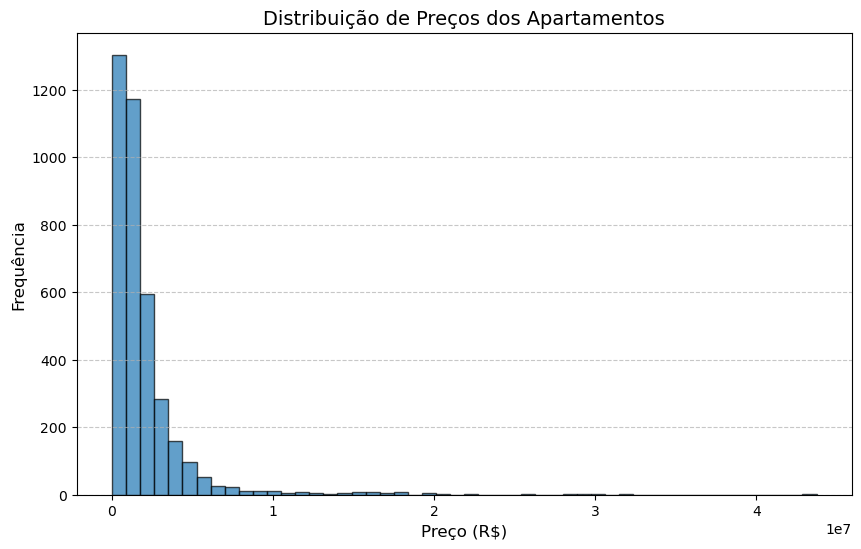

In [76]:
import matplotlib.pyplot as plt

# Histograma da distribuição de preços
plt.figure(figsize = (10,6))
plt.hist(data_filtrado['Price'], bins=50,edgecolor='k', alpha=0.7)
plt.title('Distribuição de Preços dos Apartamentos', fontsize=14)
plt.xlabel('Preço (R$)',fontsize=12)
plt.ylabel('Frequência',fontsize=12)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

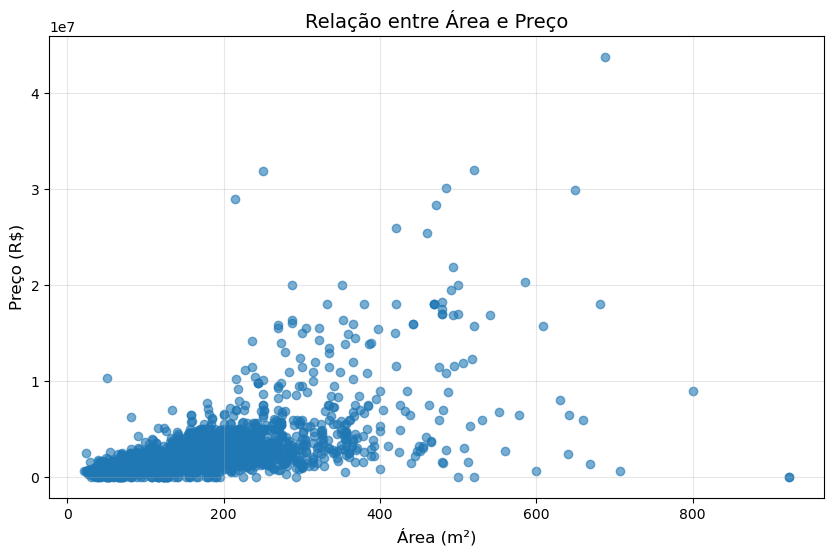

In [78]:
# Scatter plot: Área vs. Preço
plt.figure(figsize=(10, 6))
plt.scatter(data_filtrado['Area'], data_filtrado['Price'], alpha=0.6)
plt.title('Relação entre Área e Preço', fontsize=14)
plt.xlabel('Área (m²)', fontsize=12)
plt.ylabel('Preço (R$)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

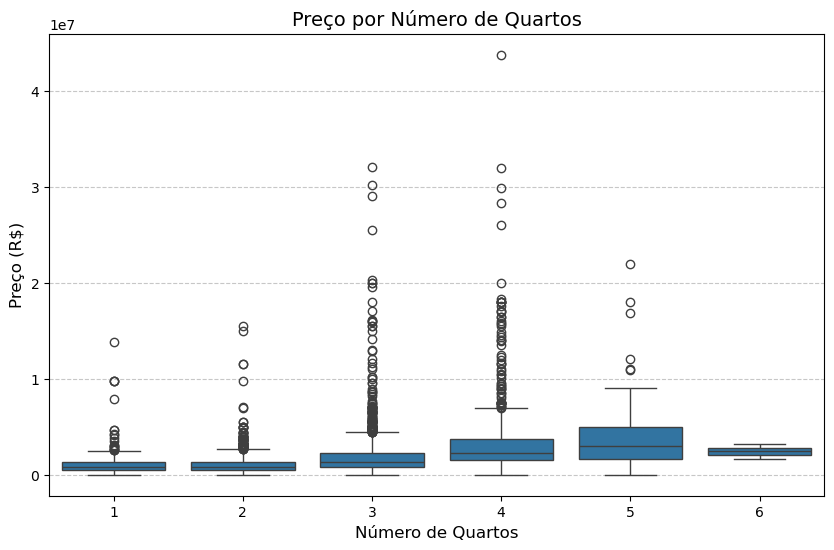

In [80]:
import seaborn as sns

# Boxplot: Preço por número de quartos
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bedrooms', y='Price', data=data_filtrado)
plt.title('Preço por Número de Quartos', fontsize=14)
plt.xlabel('Número de Quartos', fontsize=12)
plt.ylabel('Preço (R$)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


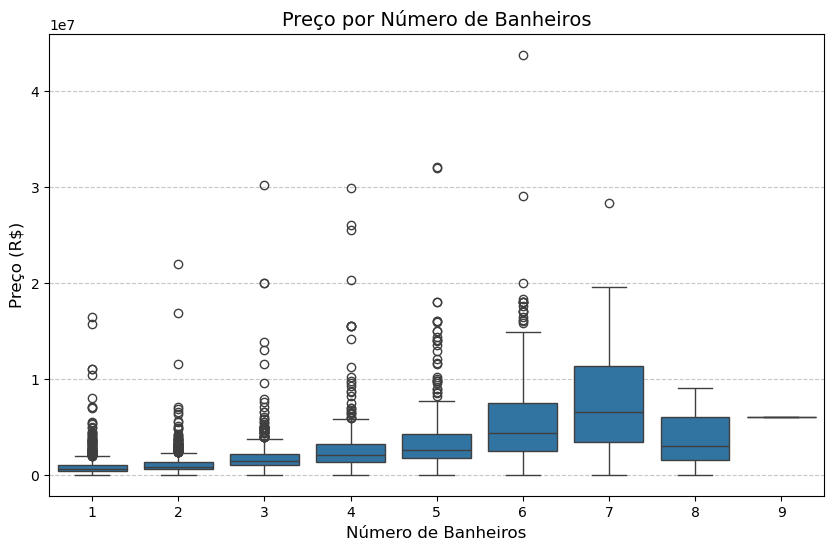

In [84]:
#Boxplot: Preço por número de banheiros
plt.figure(figsize=(10,6))
sns.boxplot(x='Bathrooms', y='Price', data=data_filtrado)
plt.title('Preço por Número de Banheiros',fontsize=14)
plt.xlabel('Número de Banheiros', fontsize = 12)
plt.ylabel('Preço (R$)', fontsize =12)
plt.grid(axis='y',linestyle='--', alpha=0.7)
plt.show()

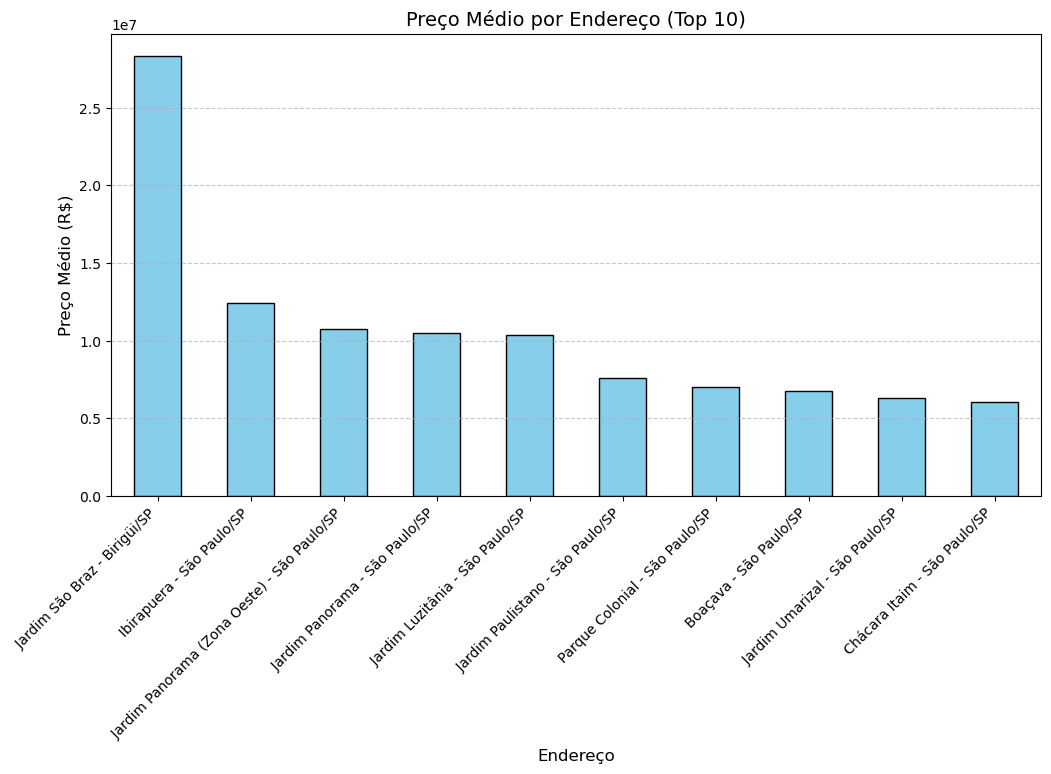

In [98]:
# Criando uma nova coluna para o bairro a partir do endereço
data_filtrado['Endereço'] = data_filtrado['Adress'].apply(lambda x: x.split(',')[1] if ',' in x else 'Indefinido')

# Calculando o preço médio por bairro
preco_por_bairro = data_filtrado.groupby('Endereço')['Price'].mean().sort_values(ascending=False).head(10)

# Gráfico de barras: Preço médio por bairro
plt.figure(figsize=(12, 6))
preco_por_bairro.plot(kind='bar', color='skyblue', edgecolor='k')
plt.title('Preço Médio por Endereço (Top 10)', fontsize=14)
plt.xlabel('Endereço', fontsize=12)
plt.ylabel('Preço Médio (R$)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 4.1 Análise das vizualizações
<hr>
<p style="text-align: justify;">
    Com base nas análises realizadas, é evidente que diversos fatores influenciam diretamente o preço dos apartamentos. Entre eles, a localização (como a rua ou avenida) se destaca como um dos principais fatores que impactam o valor, refletindo a valorização de determinadas regiões. Além disso, características do imóvel como número de banheiros e quartos, área total (m²) e quantidade de vagas de estacionamento também apresentam uma correlação positiva com o preço, indicando que, à medida que essas características aumentam, o valor do apartamento tende a ser mais elevado.
</p>

### 5. Construção de um modelo de aprendizado de máquina para prever preços de apartamentos.
<hr>
<p style="text-align: justify;">
Depois de preparar os dados e realizar a Análise exploratória, construiremos um modelo de aprendizado de máquina.
O objetivo será prever o valor de um apartamento com base nas seguintes características:
<ul>
        <li>Localização (endereço).</li>
        <li>Área (m²)</li>
        <li>Quantidade de quartos.</li>
        <li>Quantidade de banheiros.</li>
        <li>Número de vagas de estacionamento.</li>
</ul>
O objetivo é prever preços de apartamentos (variável Price), então esse é um problema de regressão. Os modelos a serem considerados devem ser especializados em regressão, testaremos três modelos: Regressão Linear, Árvore de Decisão, Random Forest.
</p>

<p style="text-align: justify;">
O melhor modelo será aquele com:
<ul>
    <li>Menor MAE (erro absoluto médio).</li>
    <li>Menor RMSE (erro quadrático médio).</li>
    <li>Maior R² (quanto mais próximo de 1, melhor).</li>
</ul>
</p>

In [125]:
from sklearn.preprocessing import LabelEncoder

# Codificar a coluna 'Adress'
label_encoder = LabelEncoder()
data_filtrado['Adress_encoded'] = label_encoder.fit_transform(data_filtrado['Adress'])


In [129]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Codificar a coluna 'Adress'
label_encoder = LabelEncoder()
data_filtrado['Adress_encoded'] = label_encoder.fit_transform(data_filtrado['Adress'])

# Selecionando as features (X) e o target (y)
X = data_filtrado[['Adress_encoded', 'Area', 'Bedrooms', 'Bathrooms', 'Parking_Spaces']]
y = data_filtrado['Price']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
# Agora iremos testar os três modelos
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Lista de modelos a serem testados
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
}

# Dicionário para armazenar resultados
results = {}

# Treinando e avaliando cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)  # Treina o modelo
    y_pred = model.predict(X_test)  # Faz previsões no conjunto de teste
    
    # Calcula as métricas
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    # Armazena os resultados
    results[name] = {'MAE': mae, 'RMSE': rmse, 'R²': r2}

# Exibindo os resultados
results_df = pd.DataFrame(results).T
print(results_df)


                            MAE          RMSE        R²
Linear Regression  9.263823e+05  1.828344e+06  0.505788
Decision Tree      1.024408e+06  2.206758e+06  0.280042
Random Forest      8.488663e+05  1.679420e+06  0.583019


Com base nas métricas avaliadas, o modelo <strong>Random Forest</strong> é o mais adequado para prever os preços de apartamentos.

### 5.1 Ajustar o modelo final
<hr>

In [140]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)

# Definir os hiperparâmetros a serem testados
param_grid = {
    'n_estimators': [100, 200, 300],          # Número de árvores na floresta
    'max_depth': [10, 20, None],             # Profundidade máxima
    'min_samples_split': [2, 5, 10],         # Mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4]            # Mínimo de amostras em uma folha
}

# Configurar o GridSearchCV
grid_search = GridSearchCV(
    estimator=rf, 
    param_grid=param_grid, 
    cv=3,                          # Validação cruzada com 3 dobras
    scoring='neg_mean_squared_error',  # Métrica de avaliação: MSE (erro quadrático médio)
    verbose=2,                     # Mostrar o progresso
    n_jobs=-1                      # Usar todos os núcleos disponíveis
)

# Treinar o GridSearchCV nos dados de treino
grid_search.fit(X_train, y_train)

# Exibir os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", grid_search.best_params_)

# Avaliar o modelo com os dados de teste
best_model = grid_search.best_estimator_  # Melhor modelo encontrado
y_pred = best_model.predict(X_test)

# Métricas de desempenho
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Melhores hiperparâmetros: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
MAE: 824438.2312848793
RMSE: 1662715.7267789906
R²: 0.5912727974370877


### 5.2 Análise do modelo final
<hr>

<p style="text-align: justify;">
Após realizar o ajuste de hiperparâmetros com o GridSearchCV, os melhores parâmetros encontrados para o modelo Random Forest foram: max_depth=10, min_samples_leaf=4, min_samples_split=2 e n_estimators=200. Essas configurações permitem que o modelo balanceie adequadamente a generalização e o desempenho, controlando a profundidade das árvores e exigindo um número mínimo de amostras em cada divisão e folha. Com esses ajustes, o modelo alcançou um RMSE (Erro Quadrático Médio) de aproximadamente R$ 1.662.715, revelando que, embora existam erros significativos em algumas situações, eles ocorrem com menor frequência. Além disso, o coeficiente de determinação (R²) foi de 59,1%, demonstrando que o modelo consegue explicar cerca de 59% da variabilidade nos preços dos apartamentos.
</p>
<p style="text-align: justify;">
Embora o ajuste tenha mostrado uma leve melhora em relação ao modelo original, as métricas indicam que ainda existem oportunidades de refinamento. Fatores como alta variabilidade nos preços e a ausência de informações adicionais, como bairros ou características específicas do imóvel, podem estar limitando o desempenho do modelo. Estratégias como a inclusão de novas features, como a localização detalhada processada a partir da variável Adress, experimentação com outros modelos, como XGBoost ou LightGBM, e o tratamento de outliers podem ajudar a melhorar ainda mais o modelo. Mesmo assim, o modelo ajustado apresenta resultados consistentes e está bem preparado para prever preços de apartamentos dentro do escopo dos dados fornecidos.
</p>